#  [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) 

In [2]:
%matplotlib inline
from mxnet.gluon import data as gdata
from mxnet import ndarray as nd
import sys
import d2l
import time

Next, we will download this data set through Gluon's `data` package. 

In [ ]:
mnist_train = gdata.vision.FashionMNIST(train=True)
mnist_test = gdata.vision.FashionMNIST(train=False)

download failed, retrying, 4 attempts left


In [3]:
len(mnist_train), len(mnist_test)

(60000, 10000)

We can access any example by square brackets `[]`, and next, we will get the image and label of the first example.

In [4]:
feature, label = mnist_train[0]
print(feature.shape, feature.dtype)
print(label, type(label), label.dtype)

(28, 28, 1) <class 'numpy.uint8'>
2 <class 'numpy.int32'> int32


In [5]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_fashion_mnist(images, labels):
    d2l.use_svg_display()
    # Here _ means that we ignore (not use) variables.
    _, figs = d2l.plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.reshape((28, 28)).asnumpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)

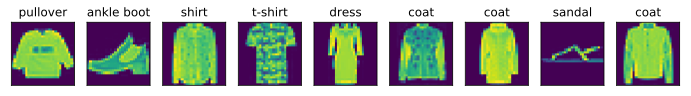

In [6]:
X, y = mnist_train[0:9]
show_fashion_mnist(X, get_fashion_mnist_labels(y))

In [7]:
batch_size = 256
transformer = gdata.vision.transforms.ToTensor()
if sys.platform.startswith('win'):
    num_workers = 0  # 0 means no additional processes are needed to speed up the reading of data.
else:
    num_workers = 4

train_iter = gdata.DataLoader(mnist_train.transform_first(transformer),
                              batch_size, shuffle=True,
                              num_workers=num_workers)
test_iter = gdata.DataLoader(mnist_test.transform_first(transformer),
                             batch_size, shuffle=False,
                             num_workers=num_workers)

Let's look at the time it takes to read the training data.

In [8]:
start = time.time()
for X, y in train_iter:
    continue
'%.2f sec' % (time.time() - start)

'3.66 sec'